# Face Recognition with Sightengine - Exercise

Did you know that every time you upload a photo to Facebook, the platform uses facial recognition algorithms to identify the people in that image? Or that certain governments around the world use face recognition technology to identify and catch criminals? I don’t need to tell you that you can now unlock smartphones with your face!

In this Notebook we will explain the inner workings of face recognition, and then use an API to implement a celebrity recognition program in Python.

## 1. Understanding how Face Recognition works

Every Machine Learning algorithm takes a dataset as input and learns from this data. The algorithm goes through the data and identifies patterns in the data. For instance, suppose we wish to identify whose face is present in a given image, there are multiple things we can look at as a pattern:

- Height of face (cm): 23.1
- Width of face (cm): 15.8
- Average color of face (R, G, B): (255, 224, 189)
- Width of lips (cm): 5.2
- Height of nose (cm): 4.4

<img src="./resources/fr.png" style="height: 250px"/>

So, our image is now a vector that could be represented as (23.1, 15.8, 255, 224, 189, 5.2, 4.4). Of course there could be countless other features that could be derived from the image (for instance, hair color, facial hair, spectacles, etc). 

Now, once we have encoded each image into a feature vector, the problem becomes much simpler. Clearly, when we have 2 faces (images) that represent the same person, the feature vectors derived will be quite similar. Put it the other way, the *distance* between the 2 feature vectors will be quite small.

## 2. Sightengine API

Sightengine is an Artificial Intelligence company in Paris. Their powerful image and video analysis technology is built on proprietary state-of-the-art Deep Learning systems and is made available through simple and clean APIs. We will use the API of Sightengine to develop a celebrity recognition engine.

First go to sightengine.com and create a free account (2000 operations/month):

<img src="./resources/sightengine.png" style="height: 350px"/>

Install the Sightengine Python package.

In [1]:
pip install sightengine

Note: you may need to restart the kernel to use updated packages.


## 3. API

In the resources folder you will find two images *filmstars.jpg* and *marvel.jpg*. 

<img src="./resources/filmstars.jpg" style="height: 300px"/>

Call the API with your personal api key and check for the celebrities in one of the two images. Print the output and inspect the json result.

In [10]:
# this example uses requests
import requests
import json

params = {
  'models': 'celebrities',
  'api_user': '1870021639',
  'api_secret': 'YLBw93oQDrDRffw85wtJkEDvJFUkNZZJ'
}
files = {'media': open('./resources/marvel.jpg', 'rb')}
r = requests.post('https://api.sightengine.com/1.0/check.json', files=files, data=params)

output = json.loads(r.text)



# Print the list of celebrity names
highest_prob_names = [
    max(celeb_list, key=lambda x: x['prob'])['name'] if celeb_list else None
    for face in output['faces']
    for celeb_list in [face.get('celebrity', [])]
]

# Print the list of names with the highest probability
print(highest_prob_names)

['Don Cheadle', 'Oliver Hudson', 'Raul Malo', 'Adele', 'Scarlett Johansson', 'Chris Evans', 'Chris Hemsworth', 'Robert Downey Jr.']


## 4. OpenCV

Now use OpenCV and Matplotlib to draw a rectangle around every celebrity. Print the name of the celebrity under the rectangle. The text is always centered with the rectangle. You should get:

<img src="./resources/marvelout.png" style="height: 450px"/>

Try the other image as well or download an image of your favorite celebrities.

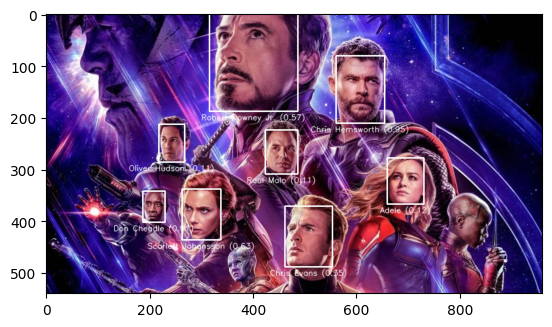

In [18]:
import cv2
cv2.__version__
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('./resources/marvel.jpg')

# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw rectangles and print names
for face in output['faces']:
    celeb_list = face.get('celebrity', [])
    if celeb_list:
        celebrity = max(celeb_list, key=lambda x: x['prob'])

        x1, y1, x2, y2 = int(face['x1'] * img.shape[1]), int(face['y1'] * img.shape[0]), \
                         int(face['x2'] * img.shape[1]), int(face['y2'] * img.shape[0])

        # Draw rectangle
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 255, 255), 2)

        # Print name under the rectangle (centered)
        text = f"{celebrity['name']} ({celebrity['prob']:.2f})"
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(text, font, 0.5, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y2 + text_size[1] + 5  # Adjust the 5 for spacing

        cv2.putText(img_rgb, text, (text_x, text_y), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

# Display the image with rectangles and names
plt.imshow(img_rgb)
plt.show()